In [39]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re 
import string 

from wordcloud import STOPWORDS, WordCloud

Pandas and NumPy: Pandas is a tool for data analysis and manipulation, effective with both numeric and alphanumeric data. NumPy specializes in handling numerical data, offering functionalities for mathematical operations on arrays.

Seaborn and matplotlib.pyplot: Seaborn, built on matplotlib, simplifies data visualization, allowing easier graphing of data. These libraries integrate well with Pandas for enhanced data handling.

Scikit-Learn (sklearn): This open-source machine learning library for Python is widely used. It provides a range of functions and methods for diverse ML projects.

Re and String: 'Re' refers to Regular Expressions, useful for extracting specific text patterns from larger text bodies. The string module offers various utilities for text or string manipulation, such as counting letters in a text.

In [5]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [6]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Data from a .csv file was read, and the first five rows were viewed using the .head() method.

In [8]:
data_fake['class'] = 0 
data_true['class'] = 1 

In [9]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

Classifications columns for fake and true news are created.

In [10]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1) :
    data_fake.drop([i], axis = 0, inplace = True)
    
    
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1) :
    data_true.drop([i], axis = 0, inplace = True)

In [11]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [12]:
data_fake_manual_testing['class'] = 0 
data_true_manual_testing['class'] = 1

C:\Users\admin\AppData\Local\Temp\ipykernel_24220\495148641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_24220\495148641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [13]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [14]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [15]:
data_merge = pd.concat([data_fake,data_true],axis=0) 
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


After classifying them separately, the tables were combined using the .concat() method and then displayed on the screen.

In [16]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [17]:
data= data_merge.drop(['title','subject', 'date'],axis= 1) 

In [18]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [19]:
data=data.sample(frac = 1) 

In [20]:
data.head()

,text,class
11352,,0
13209,BRUSSELS (Reuters) - The chairman of European ...,1
22388,21st Century Wire says Mexico s billionaire t...,0
10339,Former MI Supreme Court Justice and black cons...,0
18123,WELLINGTON (Reuters) - A final tally in New Ze...,1


.sample() method return a random sample of items from an axis of object. With 'frac' statement, it specifies the fraction of rows to return which means that it would return 100% of the rows, effectively returning all rows but in a randomized order.

In [21]:
data.reset_index(inplace = True)
data.drop(['index'],axis=1,inplace=True)

In [22]:
data.columns

Index(['text', 'class'], dtype='object')

In [24]:
data.head()

,text,class
0,,0
1,BRUSSELS (Reuters) - The chairman of European ...,1
2,21st Century Wire says Mexico s billionaire t...,0
3,Former MI Supreme Court Justice and black cons...,0
4,WELLINGTON (Reuters) - A final tally in New Ze...,1


When inplace=True is used, the reset_index method does not generate a new DataFrame. Instead, it directly modifies and overwrites the original DataFrame.

Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

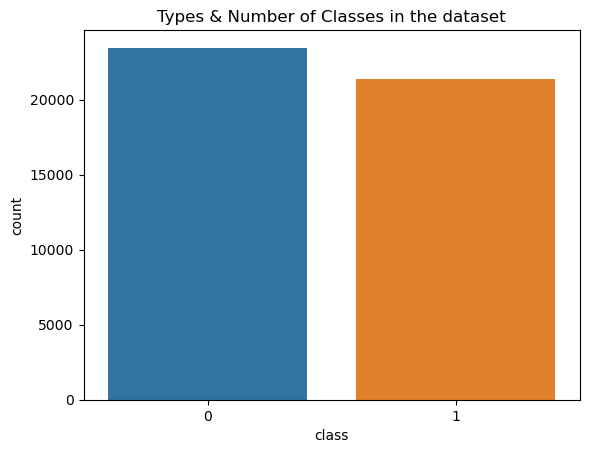

In [25]:
sns.countplot(x='class',data=data_merge)
plt.title('Types & Number of Classes in the dataset')

0 = Fake News

1 = True News

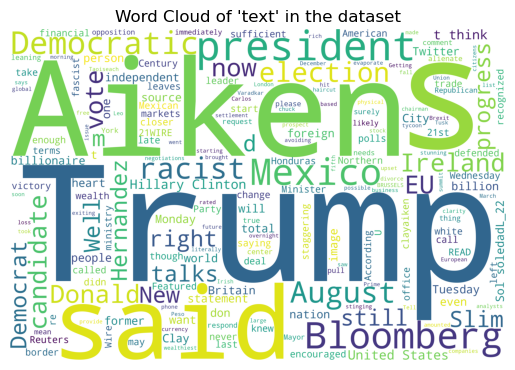

In [26]:
np.random.seed(0) # setting seed to get similar results over multiple experiments.

# word cloud for all the statements in the entire dataset
text = data['text'].values
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'text' in the dataset")
plt.show()

In [50]:
def wordopt(text) : 
    text=text.lower() # Convert text to lowercase
    text=re.sub('\[.*?\]','',text) # Remove text inside square brackets and the brackets
    text=re.sub("\\W"," ",text) # Remove non-word characters
    text=re.sub('https?://\S+|www.\.\S+', '',text) # Remove URLs
    text=re.sub('<.*?>+', '',text)  # Remove HTML tags
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    text=re.sub('\n', '', text) # Remove newline characters
    text=re.sub('\w*\d\w*', '', text) # Remove words containing digits
    return text 

A function was created for the process of text checking. The sub() function searches for patterns in the string, replacing matched strings with the specified text.

In [47]:
data['text'] = data['text'].apply(wordopt)

In [48]:
x = data['text'] 
y = data['class']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

The dataset is divided for the machine learning model, where 'X' represents the input features array, and 'Y' is the output label array. Setting test_size=0.25 means that 25% of the data is allocated for testing, leaving 75% for training. Optionally, random_state=1 can be used to control the shuffling of data before the split.

The process results in four outputs: X_train, X_test, y_train, and y_test. This is because 'X' is divided into X_train (75%) and X_test (25%), and similarly, 'Y' is split into y_train (75%) and y_test (25%). This splitting is executed in a single line of code.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorization = TfidfVectorizer() 
xv_train = vectorization.fit_transform(x_train) 
xv_test = vectorization.transform(x_test) 

To comprehend the .fit_transform() method, it is essential to understand the methods it combines:

1. '.fit()': This method is applied for transforming the dataset, constructing, or labeling a model. For instance, in normalizing data between 0 and 1, it calculates the minimum and maximum values in the dataset.

2. '.transform()': This method executes the transformation. However, it cannot be utilized before applying .fit(), as a dataset cannot be transformed without first being fitted.

3. '.fit_transform()': This method concurrently executes both .fit() and .transform(), streamlining the process of fitting the data and then transforming it.

When training a model, it is crucial to apply .fit() or .fit_transform() methods solely to the training data. Fitting the model with test data could inadvertently provide hints about this data to the model. The model should learn exclusively from the training data. 
Therefore, .fit_transform() is typically used for training data to both fit and transform it, while .transform() is reserved for test data, ensuring the model is only transforming this data based on the parameters learned from the training data.

In [52]:
from sklearn.linear_model import LogisticRegression 

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

Logistic Regression is employed for modeling binary variables with outcomes that are binary, typically represented by 0 and 1. As an illustration, in the context of a plane crash, 0 may signify fatalities, while 1 represents survivors.

In [53]:
pred_lr = LR.predict(xv_test)

In [54]:
LR.score(xv_test,y_test)

0.9872549019607844

In [55]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5883
           1       0.98      0.99      0.99      5337

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



The predicted label information was acquired using the predict function, employing methods like regression, classification, and clustering.

To assess the performance of Logistic Regression, we examined the score using the .score(X, y) method. The calculation is based on the model's determination coefficient, denoted as R^2, and is computed as score=(X_test, y_test).

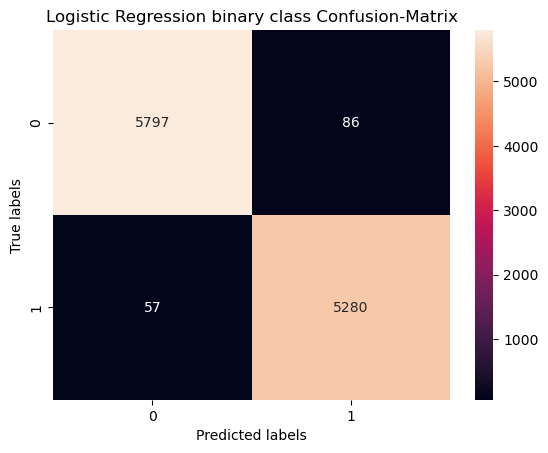

In [56]:
matrix=confusion_matrix(y_test, pred_lr) # getting the results of confusion matrix from the classification.
sns.heatmap(matrix, annot = True,fmt='g')       # printing the matrix
plt.title('Logistic Regression binary class Confusion-Matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels');

In [57]:
from sklearn.tree import DecisionTreeClassifier 

DT = DecisionTreeClassifier() 
DT.fit(xv_train, y_train) 

DecisionTreeClassifier()

In [58]:
pred_dt = DT.predict(xv_test)

In [59]:
DT.score(xv_test, y_test) 

0.9955436720142602

In [60]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5883
           1       1.00      0.99      1.00      5337

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



A Decision Tree is utilized to partition a dataset, which may consist of numerous records, into smaller sets through the application of decision rules. Alternatively, it serves as a structure that divides large amounts of records into very small groups by employing straightforward decision-making steps.

The process involves multiple algorithms to determine whether to split a node into two or more child nodes. The creation of child nodes aims to enhance the homogeneity of these nodes. In simpler terms, the purity of the node increases in relation to the target variables.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier 

In [62]:
GB = GradientBoostingClassifier(random_state = 1) 

In [63]:
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=1)

In [64]:
pred_gb = GB.predict(xv_test) 

In [65]:
GB.score(xv_test, y_test)

0.9961675579322639

Gradient Boosting represents an enhanced modeling technique wherein numerous weak algorithms are combined to create a robust algorithm. The weak learners in this context are individual decision trees. These trees are connected sequentially, and each tree aims to minimize the mistakes and errors of the previous tree in the series.

In [66]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5883
           1       0.99      1.00      1.00      5337

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [67]:
from sklearn.ensemble import RandomForestClassifier 

RF = RandomForestClassifier(random_state = 0) 
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [68]:
pred_rf = RF.predict(xv_test)

In [69]:
RF.score(xv_test, y_test) 

0.9898395721925134

The Random Forest approach merges hundreds of decision trees, training each one on a distinct sample of observations. This method often achieves higher predictive accuracy compared to a single decision tree, as it averages the predictive outcomes from various trees.

In [70]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5883
           1       0.99      0.99      0.99      5337

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [71]:
def output_lable(n) : 
    if n == 0: 
        return "Fake News"
    elif n == 1:
        return "Not A Fake News" 
    

def manual_testing(news) : 
    testing_news = {"text":[news]} 
    new_def_test = pd.DataFrame(testing_news) 
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test) 
    pred_DT = DT.predict(new_xv_test) 
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test) 
    
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRF Prediction: {}".format(output_lable(pred_LR[0]), output_lable(pred_DT[0]), output_lable(pred_GB[0]), output_lable(pred_RF[0])))

Two methods were established: one for output labeling and another for manual testing. These methods are designed to predict the authenticity of news, relying on models for predictions. Variables such as 'pred_LR' or 'new_xv_test', derived from our models, are utilized in the 'manual_testing()' method.

In [76]:
news = str(data_fake_manual_testing) 
manual_testing(news)



LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RF Prediction: Fake News


In [77]:
news = str(data_true_manual_testing) 
manual_testing(news)



LR Prediction: Not A Fake News 
DT Prediction: Not A Fake News 
GBC Prediction: Not A Fake News 
RF Prediction: Not A Fake News


In [80]:
news = str(input()) 
manual_testing(news)

ANAMIZU, Japan: Hampered by bad weather and damaged roads, Japanese rescuers searched on Friday for 222 people still missing four days after a devastating earthquake as the death toll approached 100. Two elderly women were pulled from the rubble on Thursday, but hopes of finding other survivors after the 7.5 magnitude quake on New Year's Day were fading with rain, snow and falling temperatures forecast in the coming days. Thousands of rescuers from all over Japan have been battling aftershocks and roads littered with gaping holes and blocked by frequent landslides in the central Ishikawa region to reach hundreds of people in stranded communities. On Thursday afternoon, 72 hours after the quake, the two older women were miraculously pulled alive from the remains of their homes in Wajima, one of them thanks to a sniffer dog. The port city of Wajima on the Noto Peninsula was one of the worst hit, with a pungent smell of soot still in the air and faint columns of smoke visible from a huge 

In [81]:
news = str(input()) 
manual_testing(news)

Trump Administration to Launch “Black Beans Matter” Campaign Posted about 3 years ago | Comments Offon Trump Administration to Launch “Black Beans Matter” Campaign     President Donald John Trump owning snooty liberals by supporting Mexican food brand “Goya” after years of caging immigrant children and referring to Mexican people as animals and rapists.  <Washington, DC>The Trump Administration has launched a “Black Beans Matter” (“Frijoles Negros Importan”) campaign in support of a Goya Foods whose top executive was criticized last week for supporting President Trump.  The campaign is focused on increasing sales of Mexican owned Goya food brands, as well as securing Latino votes for the upcoming election.  Critics of the president have been calling for a boycott of Goya after CEO Robert Unanue stated “We’re all truly blessed at the same time to have a leader like President Trump, who is a builder” at a White House event.  Unanue continued, “”He came to this country to build, to grow, 